## **Import data and librairies**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

In [20]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

In [21]:
G2 = nx.Graph()
G2.add_nodes_from([1,2,3])
G2.add_edges_from([(1,2),(1,3)])

In [23]:
import networkx as nx
import numpy as np
from itertools import combinations

# Function to count subgraphs of size k in a graph
def count_subgraphs(graph, k):
    subgraph_count = 0
    if k == 0:
        return 1  # Handle the case when k is 0, there's one empty subgraph
    for nodes in combinations(graph.nodes(), k):
        subgraph = graph.subgraph(nodes)
        if nx.is_connected(subgraph):
            subgraph_count += 1
    return subgraph_count

# Calculate the graphlet kernel of size 3 for G and G2
def graphlet_kernel(graph1, graph2, k=3):
    kernel_value = 0
    for i in range(k + 1):  # Include k=0
        subgraph_count1 = count_subgraphs(graph1, i)
        subgraph_count2 = count_subgraphs(graph2, i)
        kernel_value += min(subgraph_count1, subgraph_count2)
    return kernel_value

# Calculate the graphlet kernel for G and G2
kernel_value = graphlet_kernel(G, G2, k=3)

print(f"Graphlet Kernel Value: {kernel_value}")

Graphlet Kernel Value: 7


In [10]:
G2.number_of_edges()

1

### **LOAD GRAPH AND SIMPLE STATISTICS**

In [15]:
############## Task 1

graph = nx.read_edgelist('CA-HepTh.txt', comments='#', delimiter='\t', encoding='utf-8')
nb_nodes = graph.number_of_nodes()
nb_edges = graph.number_of_edges()

print(f"The graph has {nb_nodes} nodes.")
print(f"The graph has {nb_edges} edges.")

The graph has 9877 nodes.
The graph has 25998 edges.


### **CONNECTED COMPONENTS**

In [16]:
############## Task 2
connected_components = nx.connected_components(graph)
nb_connected_components = nx.number_connected_components(graph)

print(f"The graph has {nb_connected_components} connected components.")

The graph has 429 connected components.


In [17]:
largest_cc = max(connected_components, key=len)
graph_largest_cc = graph.subgraph(largest_cc).copy()

nb_nodes_largest_cc = graph_largest_cc.number_of_nodes()
nb_edges_largest_cc = graph_largest_cc.number_of_edges()

fraction_edges = (nb_edges_largest_cc/nb_edges)*100
fraction_nodes = (nb_nodes_largest_cc/nb_nodes)*100

print(f"The number of nodes on the largest connected components is {nb_nodes_largest_cc}")
print(f"The number of edges on the largest connected components is {nb_edges_largest_cc}")
print(f"The largest connected components graph corresponds to {fraction_edges} of the whole edges of the graph")
print(f"The largest connected components graph corresponds to {fraction_nodes} of the whole nodes of the graph")

The number of nodes on the largest connected components is 8638
The number of edges on the largest connected components is 24827
The largest connected components graph corresponds to 95.49580736979767 of the whole edges of the graph
The largest connected components graph corresponds to 87.45570517363572 of the whole nodes of the graph


### **Analysis of the Degree Distribution of the Graph**

In [18]:
############## Task 3
degree_sequence = [graph.degree(node) for node in graph.nodes()]
min_degree = min(degree_sequence)
max_degree = max(degree_sequence)
mean_degree = np.mean(degree_sequence)

print(f"The maximum degree_sequence is {max_degree}")
print(f"The minimum degree_sequence is {min_degree}")
print(f"The mean degree_sequence is {mean_degree}")

The maximum degree_sequence is 65
The minimum degree_sequence is 1
The mean degree_sequence is 5.264351523742027


degree_histogram: This is a list where each element represents the frequency of nodes with a specific degree. The index in the list corresponds to the degree value, and the value at that index indicates how many nodes in the graph have that degree. The length of degree_histogram is typically determined by the maximum degree in your graph. If the maximum degree in your graph is 'd_max,' then len(degree_histogram) will be d_max + 1.

In [19]:
#returns a list of the frequency of each degree value
degree_histogram = nx.degree_histogram(graph)

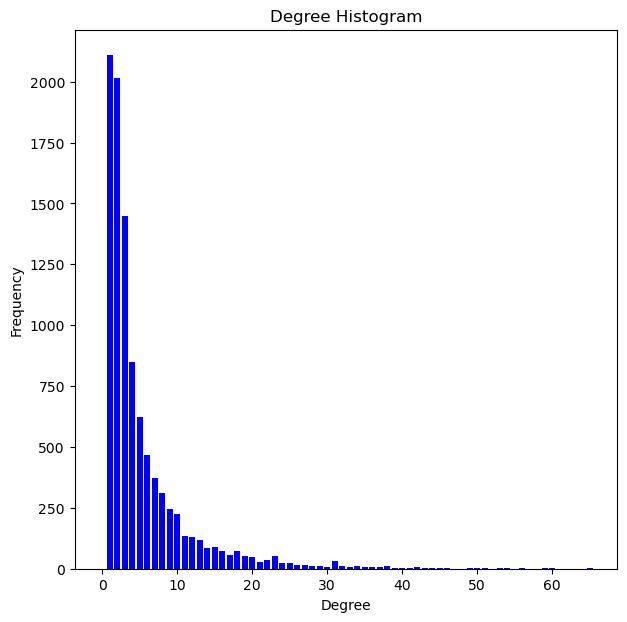

In [20]:
# Plot the degree histogram
plt.figure(figsize = (7, 7))
plt.bar(range(len(degree_histogram)), degree_histogram, color="b")
plt.title("Degree Histogram")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

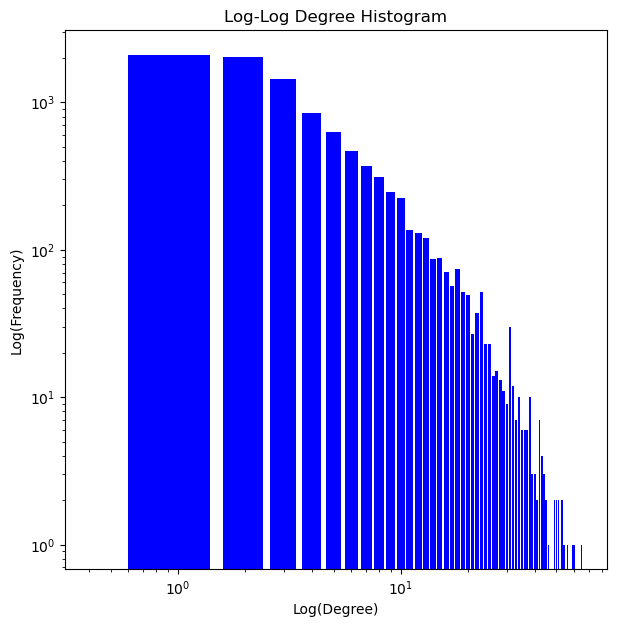

In [21]:
plt.figure(figsize=(7, 7))
plt.bar(range(len(degree_histogram)), degree_histogram, color="b")
plt.title("Log-Log Degree Histogram")
plt.xlabel("Log(Degree)")
plt.ylabel("Log(Frequency)")

# Set the y-axis and x-axis to use a logarithmic scale
plt.yscale('log')
plt.xscale('log')

plt.show()

### **Clustering Coefficient**

In [22]:
# Calculate the global clustering coefficient
global_clustering_coefficient = nx.transitivity(graph)

print(f"Global Clustering Coefficient: {global_clustering_coefficient:.4f}")

Global Clustering Coefficient: 0.2840


### **Community Detection**

If the graph (G) has K connected components, then L has K eigenvectors with an eigenvalue of 0.

In [23]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans

def spectral_clustering(G, k):
    
    A = nx.to_numpy_array(G)  # Convert the graph to a NumPy array
    n = A.shape[0]
    D = np.diag(np.sum(A, axis=1))  # Degree matrix as a diagonal matrix
    L = np.identity(n) - np.linalg.inv(D) @ A
    d = k
    
    _, U = eigs(L, k=d, which="SR")  # Calculate the top k eigenvectors
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np.real(U))
    labels = kmeans.labels_
    
    clustering = {}
    nodes = list(G.nodes())
    for i in range(n):
        clustering[nodes[i]] = labels[i]
    
    return clustering

In [46]:
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans

def spectral_clustering(G, k):
    A = nx.to_numpy_array(G)  # Convert the graph to a NumPy array
    n = G.number_of_nodes()
    D = np.diag(np.sum(A, axis=1))  # Degree matrix as a diagonal matrix
    L = np.identity(n) - np.linalg.inv(D) @ A
    d = k
    
    _, U = eigs(L, k=d, which='SR', maxiter=5000)  # Increase maxiter for better convergence

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(np.real(U))
    labels = kmeans.labels_
    
    clustering = dict(zip(G.nodes(), labels))

    return clustering

In [47]:
clustering1 = spectral_clustering(graph, 50)

C:\Users\Badr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **Modularity**

In [48]:
import networkx as nx

def modularity(G, clustering):
    m = G.number_of_edges()  # Total number of edges in the graph
    nb_clusters = len(set(clustering.values()))  # Number of clusters

    S = 0
    for i in range(nb_clusters):
        # List of nodes that belong to cluster i
        community = [node for node, cluster_id in clustering.items() if cluster_id == i]
        graph_community = G.subgraph(community)
        l = graph_community.number_of_edges()  # Number of edges within the community
        d = sum(dict(G.degree(community)).values())  # Sum of degrees of nodes in the community
        S += (l / m) - ((d / (2 * m)) ** 2)  # Divide by 2m since each edge is counted twice

    modularity = S

    return modularity

"""Compute the modularity of the following two clustering results: (i) the one obtained by the
Spectral Clustering algorithm using k = 50, and (ii) the one obtained if we randomly partition
the nodes into 50 clusters (Hint: to assign each node to a cluster, use the randint(a,b) function
which returns a random integer n such that a ≤ n ≤ b)."""

In [52]:
#clustering1 = spectral_clustering(graph, 50)
modularity1 = modularity(graph, clustering1)
print(modularity1)

0.06570007920922692


In [50]:
clustering2 = {}
for node in graph.nodes():
  clustering2[node] = random.randint(0,50)
modularity2 = modularity(graph, clustering2)
print(modularity2)

-0.0001987687443111439


# **Graph Classification using Graph Kernels**

### **Dataset Generation**

In [36]:
############## Task 10
# Generate simple dataset
def create_dataset():
    Gs = list()
    y = list()

    for i in range(3,103):
      Gs.append(nx.cycle_graph(i))
      y.append(0)
      Gs.append(nx.path_graph(i))
      y.append(1)

    return Gs, y

Gs, y = create_dataset()
Gs_train, Gs_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)

### **Implementation of Graphlet Kernel**

In [37]:
# Compute the shortest path kernel
def shortest_path_kernel(Gs_train, Gs_test):
    all_paths = dict()
    sp_counts_train = dict()

    for i,G in enumerate(Gs_train):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_train[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_train[i]:
                        sp_counts_train[i][length] += 1
                    else:
                        sp_counts_train[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    sp_counts_test = dict()

    for i,G in enumerate(Gs_test):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_test[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_test[i]:
                        sp_counts_test[i][length] += 1
                    else:
                        sp_counts_test[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi_train = np.zeros((len(Gs_train), len(all_paths)))
    for i in range(len(Gs_train)):
        for length in sp_counts_train[i]:
            phi_train[i,all_paths[length]] = sp_counts_train[i][length]


    phi_test = np.zeros((len(Gs_test), len(all_paths)))
    for i in range(len(Gs_test)):
        for length in sp_counts_test[i]:
            phi_test[i,all_paths[length]] = sp_counts_test[i][length]

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [38]:
import numpy as np
import networkx as nx

def graphlet_kernel(Gs_train, Gs_test, n_samples=200):
    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]

    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0,1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0,1)
    graphlets[2].add_edge(1,2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0,1)
    graphlets[3].add_edge(1,2)
    graphlets[3].add_edge(0,2)

    phi_train = np.zeros((len(Gs_train), 4))

    for i, graph in enumerate(Gs_train):
        for k in range(n_samples):
            sampled_nodes = np.random.choice(list(graph.nodes()), 3)
            subgraph = graph.subgraph(sampled_nodes)

            # Compare the subgraph with each predefined graphlet
            for j, graphlet in enumerate(graphlets):
                if nx.is_isomorphic(subgraph, graphlet):
                    phi_train[i][j] += 1
                    
    phi_test = np.zeros((len(Gs_test), 4))

    for i, graph in enumerate(Gs_test):
        for k in range(n_samples):
            # Randomly sample three nodes
            sampled_nodes = np.random.choice(list(graph.nodes()), 3)
            subgraph = graph.subgraph(sampled_nodes)

            # Compare the subgraph with each predefined graphlet
            for j, graphlet in enumerate(graphlets):
                if nx.is_isomorphic(subgraph, graphlet):
                    phi_test[i][j] += 1

    # Compute the kernel matrices
    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

In [125]:
K_train, K_test = graphlet_kernel(Gs_train, Gs_test, n_samples=200)

### **Graph Classification using SVM**

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#### **SVM using shortest path kernel**

In [40]:
K_train, K_test = shortest_path_kernel(Gs_train, Gs_test)

In [41]:
#Initialize SVM and train
clf = SVC(kernel ='precomputed')
clf.fit(K_train, y_train)

#Predict
y_pred = clf.predict(K_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


#### **SVM using graphlet kernel**

In [53]:
K_train, K_test = graphlet_kernel(Gs_train, Gs_test, n_samples=200)

In [54]:
#Initialize SVM and train
clf = SVC(kernel ='precomputed')
clf.fit(K_train, y_train)

#Predict
y_pred = clf.predict(K_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60
